In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from scripts.transformers import load_and_save_bronze

raw_zone = os.path.expanduser('~/Downloads/dataset.parquet')
bronze_zone = "./data/bronze"

df = load_and_save_bronze(raw_zone, bronze_zone)
df.show(5)


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/01/08 17:15:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+--------------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee| ingestion_timestamp|         source_file|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+--------------------+--------------------+
|   

In [3]:
df.show() 

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+--------------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee| ingestion_timestamp|         source_file|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+--------------------+--------------------+
|   

In [4]:
unique = df.select("VendorId").distinct()
unique.show()

+--------+
|VendorId|
+--------+
|       1|
|       7|
|       2|
|       6|
+--------+



In [5]:
unique = df.select("cbd_congestion_fee").distinct()
unique.show()

+------------------+
|cbd_congestion_fee|
+------------------+
|               0.0|
|             -0.75|
|              0.75|
+------------------+



In [6]:
columns = df.columns
row_count = df.count()
print("Number of rows: ", row_count)
print("Number of columns: ", len(columns))
print(columns)

Number of rows:  3475226
Number of columns:  22
['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'cbd_congestion_fee', 'ingestion_timestamp', 'source_file']


In [7]:
df.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)
 |-- cbd_congestion_fee: double (nullable = true)
 |-- ingestion_timestamp: timestamp (nullable = false)
 |-- source_file: str

In [8]:
df.summary()

DataFrame[summary: string, VendorID: string, passenger_count: string, trip_distance: string, RatecodeID: string, store_and_fwd_flag: string, PULocationID: string, DOLocationID: string, payment_type: string, fare_amount: string, extra: string, mta_tax: string, tip_amount: string, tolls_amount: string, improvement_surcharge: string, total_amount: string, congestion_surcharge: string, Airport_fee: string, cbd_congestion_fee: string, source_file: string]

In [9]:
df.describe().show()

26/01/08 17:15:28 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+---------------------+------------------+--------------------+-------------------+-------------------+--------------------+
|summary|          VendorID|   passenger_count|    trip_distance|       RatecodeID|store_and_fwd_flag|     PULocationID|      DOLocationID|      payment_type|       fare_amount|             extra|            mta_tax|        tip_amount|       tolls_amount|improvement_surcharge|      total_amount|congestion_surcharge|        Airport_fee| cbd_congestion_fee|         source_file|
+-------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------

In [10]:
from pyspark.sql.functions import col, sum, when, count

null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

null_counts.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|ingestion_timestamp|source_file|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------------+-----------+
|       0|                   0|   

In [11]:
percentage_od_null = (540149 / df.count())*100
percentage_od_null

15.54284527107014

In [12]:
# Drop all the columns with the null values
df = df.na.drop(how='any')

In [13]:
# Check for nulls after drop => 0
null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

null_counts.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|ingestion_timestamp|source_file|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------------+-----------+
|       0|                   0|   

In [14]:
df = df.drop("ingestion_timestamp", "source_file")
df.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|       1| 2025-01-01 00:18:38|  2025-01-01 00:26:59|              1|          1.6|         1|                 N|         229|    

In [15]:
from pyspark.sql.functions import col, unix_timestamp, round

df = df.withColumn("trip_duration", 
    (unix_timestamp(col("tpep_dropoff_datetime")) - 
     unix_timestamp(col("tpep_pickup_datetime"))) / 60
)

df = df.withColumn("trip_duration", round(col("trip_duration"), 2))

In [16]:
df.show(20)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|trip_duration|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------+
|       1| 2025-01-01 00:18:38|  2025-01-01 00:26:59|              1|          1.6|     

In [17]:
row_count = df.count()
print("Number of rows: ", row_count)

Number of rows:  2935077


# Analysis of Numerical Data

In [37]:
numerical_cols = ['passenger_count','trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','Airport_fee','cbd_congestion_fee','trip_duration']
print(len(numerical_cols))

15


In [18]:
# Select all the rows with the passenger count greater than 0
df = df.filter(col("passenger_count") > 0)

From the trip distance summary, we can see that the minimum is 0 and the maximum is 44,730.3, which are clearly invalid. Therefore, I will keep only trips with distances between 1 and 200 miles.

In [19]:
df.select("trip_distance").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+-------------+
|summary|trip_distance|
+-------+-------------+
|  count|      2910421|
|    min|          0.0|
|    25%|         0.96|
|    50%|          1.6|
|    75%|          3.0|
|    max|      44730.3|
+-------+-------------+



In [20]:
df = df.filter(col("trip_distance") > 0)
df = df.filter(col("trip_distance") < 200)

From the trip duration summary, we can see that the min is -56.03 and max is 5626.32, which is invalid, therefore, I will keep only trips with durations between 1 and 1440 minutes (24 hours), which us a reasonable for a taxi

In [21]:
df.select("trip_duration").summary("count", "min", "25%", "50%", "75%", "max").show()


+-------+-------------+
|summary|trip_duration|
+-------+-------------+
|  count|      2872499|
|    min|       -56.03|
|    25%|         7.05|
|    50%|        11.35|
|    75%|        18.15|
|    max|      5626.32|
+-------+-------------+



In [22]:
df = df.filter(col("trip_duration") > 0)
df = df.filter(col("trip_duration") <= 24 * 60)


In [23]:
df.select("trip_duration").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+-------------+
|summary|trip_duration|
+-------+-------------+
|  count|      2871262|
|    min|         0.02|
|    25%|         7.05|
|    50%|        11.35|
|    75%|        18.15|
|    max|      1439.87|
+-------+-------------+



In [24]:
df.select("fare_amount").summary("count", "min", "25%", "50%", "75%", "max").show()


+-------+-----------+
|summary|fare_amount|
+-------+-----------+
|  count|    2871262|
|    min|     -900.0|
|    25%|        8.6|
|    50%|       12.1|
|    75%|       19.1|
|    max|  863372.12|
+-------+-----------+



In [25]:
df = df.filter(
    (col("fare_amount") > 0) &
    (col("fare_amount") <= 500)
)


In [26]:
df.select("extra").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+-------+
|summary|  extra|
+-------+-------+
|  count|2815560|
|    min|    0.0|
|    25%|    0.0|
|    50%|    1.0|
|    75%|    2.5|
|    max|   15.0|
+-------+-------+



In [27]:
df.select("mta_tax").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+-------+
|summary|mta_tax|
+-------+-------+
|  count|2815560|
|    min|    0.0|
|    25%|    0.5|
|    50%|    0.5|
|    75%|    0.5|
|    max|    6.5|
+-------+-------+



In [28]:
df.select("tip_amount").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+----------+
|summary|tip_amount|
+-------+----------+
|  count|   2815560|
|    min|       0.0|
|    25%|      1.33|
|    50%|      2.89|
|    75%|      4.26|
|    max|     400.0|
+-------+----------+



In [29]:
df.select("tolls_amount").summary("count", "min", "25%", "50%", "75%", "max").show()


+-------+------------+
|summary|tolls_amount|
+-------+------------+
|  count|     2815560|
|    min|         0.0|
|    25%|         0.0|
|    50%|         0.0|
|    75%|         0.0|
|    max|      126.94|
+-------+------------+



In [30]:
df.select("improvement_surcharge").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+---------------------+
|summary|improvement_surcharge|
+-------+---------------------+
|  count|              2815560|
|    min|                  0.0|
|    25%|                  1.0|
|    50%|                  1.0|
|    75%|                  1.0|
|    max|                  1.0|
+-------+---------------------+



In [31]:
df.select("Airport_fee").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+-----------+
|summary|Airport_fee|
+-------+-----------+
|  count|    2815560|
|    min|        0.0|
|    25%|        0.0|
|    50%|        0.0|
|    75%|        0.0|
|    max|       1.75|
+-------+-----------+



In [32]:
df.select("cbd_congestion_fee").summary("count", "min", "25%", "50%", "75%", "max").show()


+-------+------------------+
|summary|cbd_congestion_fee|
+-------+------------------+
|  count|           2815560|
|    min|               0.0|
|    25%|               0.0|
|    50%|              0.75|
|    75%|              0.75|
|    max|              0.75|
+-------+------------------+



In [39]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=numerical_cols,
    outputCol="features"
)

df_vector = assembler.transform(df).select("features")


In [40]:
from pyspark.ml.stat import Correlation

corr_matrix = Correlation.corr(df_vector, "features", "pearson")


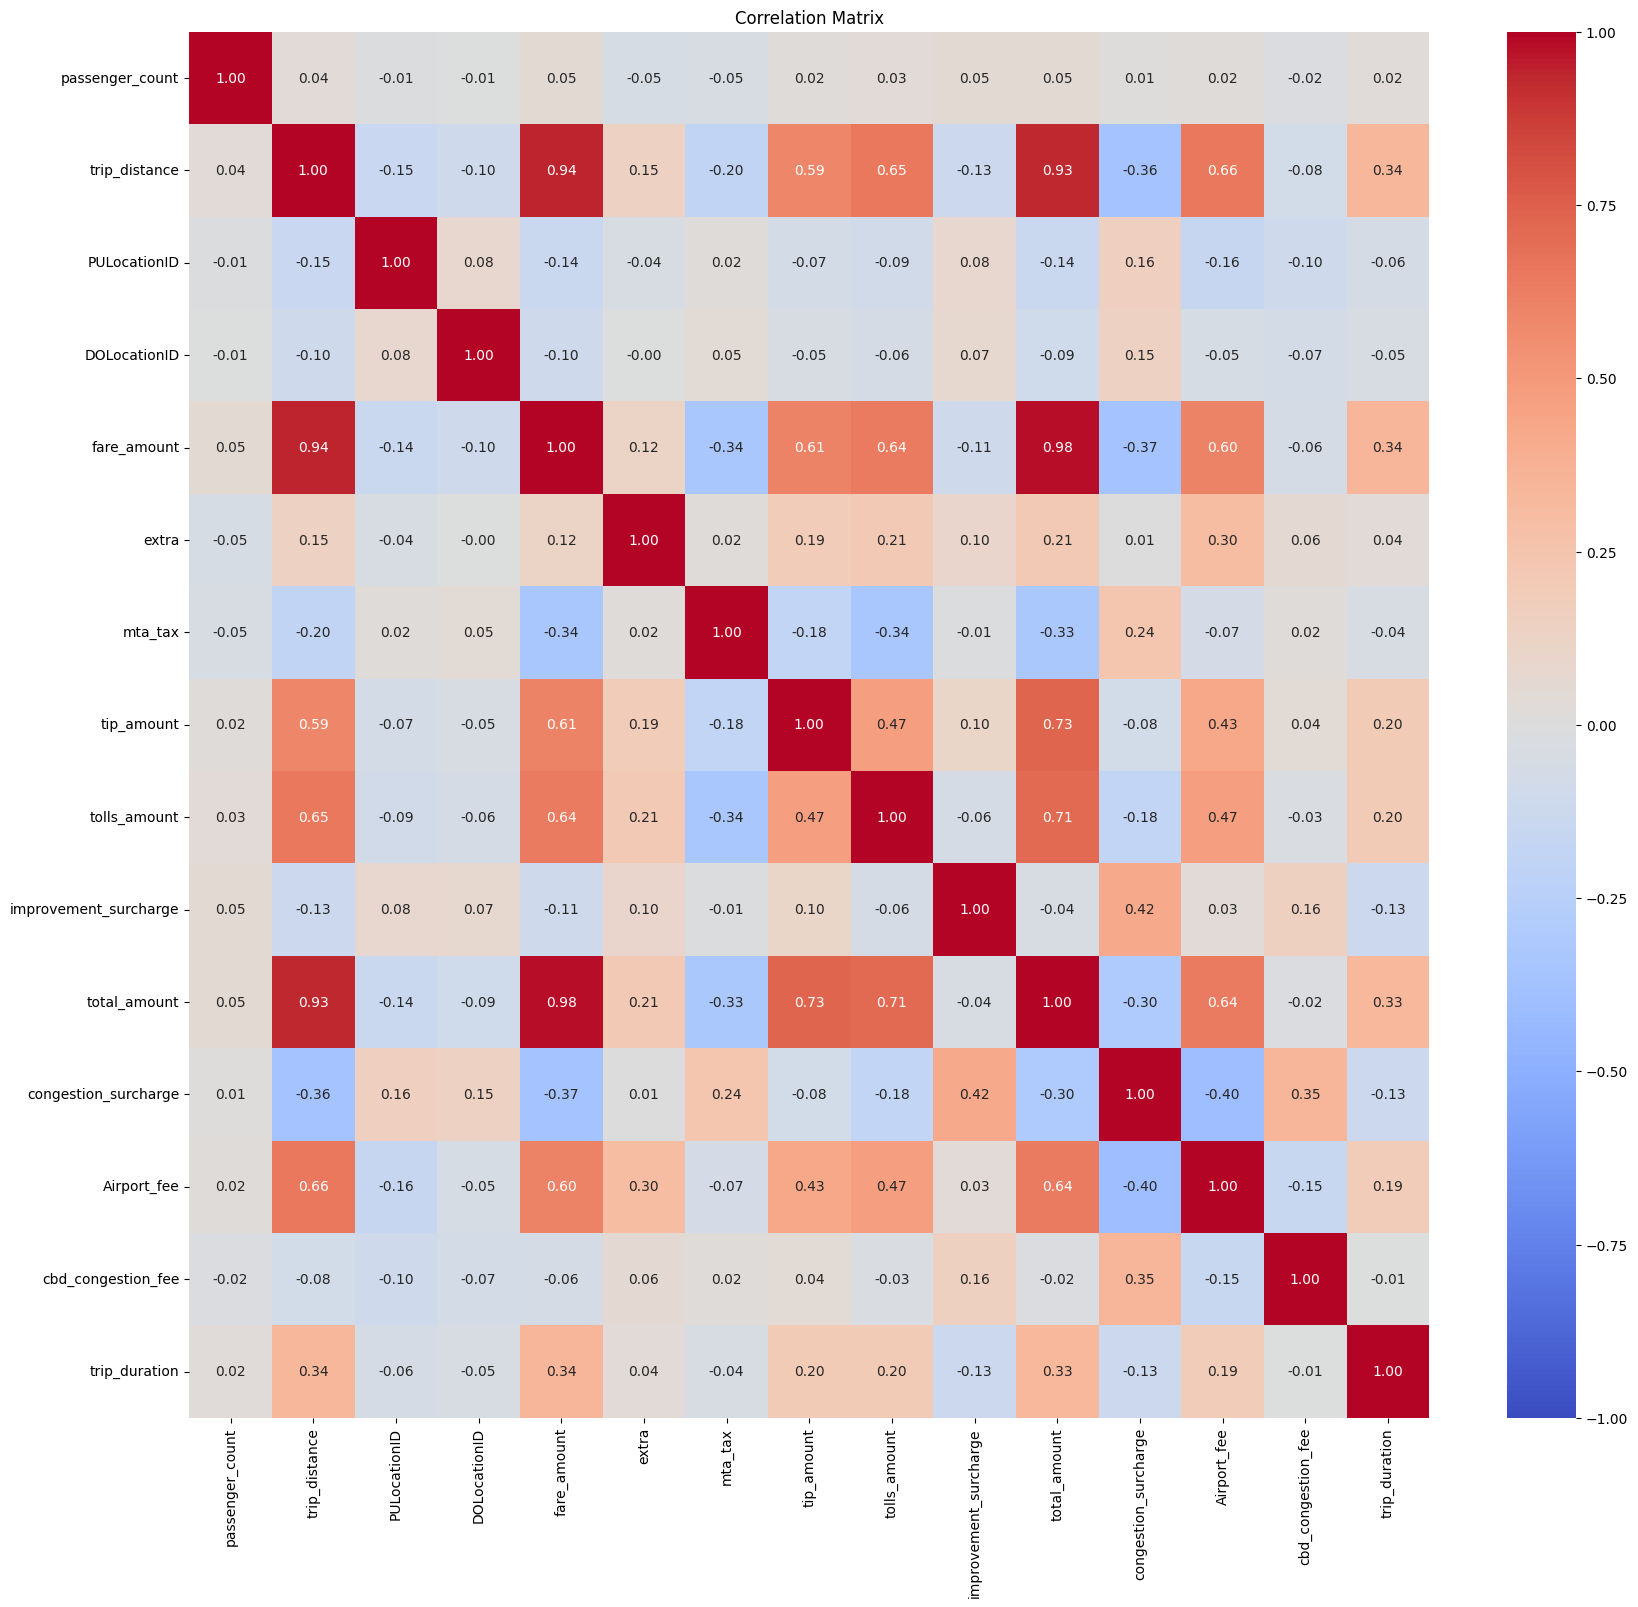

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_array = corr_matrix.head()[0].toArray()


corr_df = pd.DataFrame(
    corr_array,
    columns=numerical_cols,
    index=numerical_cols
)

plt.figure(figsize=(20,18))
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)
plt.title("Correlation Matrix")
plt.show()



# Analysis of Categorical Data

In [33]:
# df_categorical = df.select("VendorID", "RatecodeID", "store_and_fwd_flag", "payment_type")

# df_categorical.show()

In [34]:
# unique = df.select("Airport_fee").distinct()
# unique.show()

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pyspark_count(df, col_name):
  counts = df.groupBy(col_name).count().toPandas()

  plt.figure(figsize=(8, 4))
  sns.barplot(x=col_name, y='count', data=counts)
  plt.title(f"Distribution of {col_name}")
  plt.show()


# plot_pyspark_count(df_categorical, "VendorID")





In [36]:
categorical_col = ["VendorID", "RatecodeID", "store_and_fwd_flag", "payment_type"]

